In [81]:
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
preprocessed_df = pd.read_csv('data/preprocessed_data/all.csv')

In [73]:
corr = preprocessed_df.corr()

<AxesSubplot:title={'center':'Feature-Set Pearson Correlation Matrix'}>

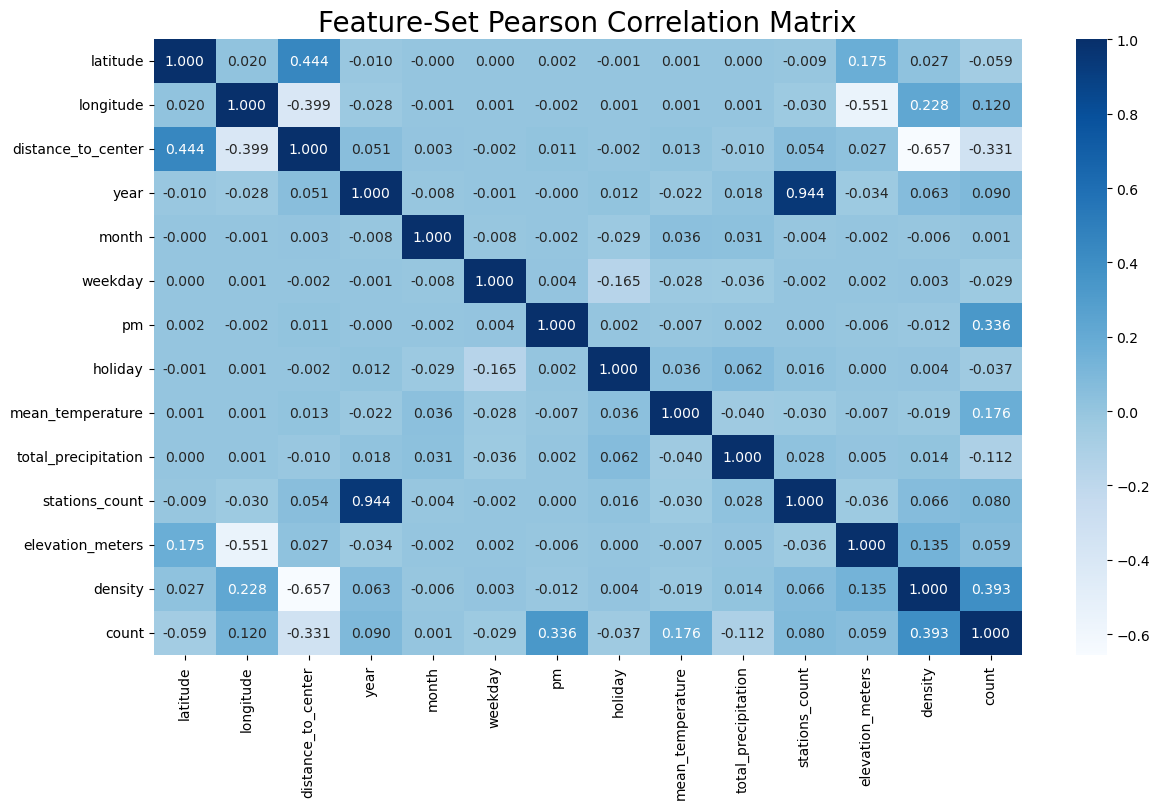

In [100]:
plt.figure(figsize=(14,8))
plt.title('Feature-Set Pearson Correlation Matrix', fontsize=20)
sns.heatmap(corr, annot=True, cmap="Blues", fmt='.3f')

In [52]:
target = preprocessed_df['count']
data = preprocessed_df.drop(columns=['count'])

In [53]:
data_train, data_test, target_train, target_test = train_test_split(
    data, target,test_size=0.2, random_state=42)

In [91]:
fs = SelectKBest(score_func=f_regression, k='all')

x_new = fs.fit_transform(data_train, target_train)

stat = pd.DataFrame({ 'feature': fs.get_feature_names_out(), 'score': fs.scores_})
stat['score'] = round(stat['score'], 2)


display(stat.sort_values(by='score', ascending=False))


,feature,score
12,density,169771.34
6,pm,117890.18
2,distance_to_center,114038.47
8,mean_temperature,29883.86
1,longitude,13640.45
9,total_precipitation,11805.37
3,year,7575.10
10,stations_count,5845.96
11,elevation_meters,3253.17
0,latitude,3219.36
